Name: Nonhlanhla Linda Luphade

Github Link: https://github.com/shelovescode000/DSI_Pre_Assignemt

In [1]:
#loading the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy import stats
%matplotlib inline

In [ ]:
#loading the data
#https://drive.google.com/drive/folders/1dl6nw0HO9XVrT8dSBJHHn3mDW9EWQpXS?usp=sharing

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df_title   = pd.read_csv('drive/MyDrive/DSI Pre Assignment/title.akas.tsv/data.tsv', sep = '\t')
df_basics  = pd.read_csv('drive/MyDrive/DSI Pre Assignment/title.basics.tsv/data.tsv', sep = '\t')
df_ratings = pd.read_csv('drive/MyDrive/DSI Pre Assignment/title.ratings.tsv/data.tsv', sep = '\t')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df_title.head(10)

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
1,tt0000001,2,Карменсита,RU,\N,\N,\N,0
2,tt0000001,3,Carmencita,US,\N,\N,\N,0
3,tt0000001,4,Carmencita,\N,\N,original,\N,1
4,tt0000002,1,Le clown et ses chiens,\N,\N,original,\N,1
5,tt0000002,2,A bohóc és kutyái,HU,\N,imdbDisplay,\N,0
6,tt0000002,3,Le clown et ses chiens,FR,\N,\N,\N,0
7,tt0000002,4,Clovnul si cainii sai,RO,\N,imdbDisplay,\N,0
8,tt0000002,5,The Clown and His Dogs,US,\N,\N,literal English title,0
9,tt0000002,6,Клоун и его собаки,RU,\N,\N,\N,0


In [5]:
df_basics.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,\N,1,Short
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,\N,1,"Short,Sport"
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,\N,1,"Documentary,Short"
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
9,tt0000010,short,Employees Leaving the Lumière Factory,La sortie de l'usine Lumière à Lyon,0,1895,\N,1,"Documentary,Short"


In [6]:
df_ratings.head(10)

,tconst,averageRating,numVotes
0,tt0000001,5.8,1422
1,tt0000002,6.4,168
2,tt0000003,6.6,1015
3,tt0000004,6.4,100
4,tt0000005,6.2,1713
5,tt0000006,5.5,88
6,tt0000007,5.5,573
7,tt0000008,5.6,1526
8,tt0000009,5.5,70
9,tt0000010,6.9,5083


In [7]:
df_title.shape

(3423660, 8)

In [8]:
df_basics.shape

(5330276, 9)

In [9]:
df_ratings.shape

(874203, 3)

In [10]:
#Dropping duplicates in all data frames (no duplicates found)
df_ratings_noduplicates = df_ratings.drop_duplicates()
df_title_noduplicates = df_title.drop_duplicates()
df_basic_noduplicates = df_basics.drop_duplicates()

In [11]:
#Using merge to combine all dataframes using titleID or tconst
#inner join basics and rating because we want whats common between the two dataframes
df_RB_inner = pd.merge(df_basic_noduplicates,df_ratings_noduplicates, on = 'tconst')
df_RB_inner.shape


(874203, 11)

In [12]:
df_RB_inner.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1422
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.4,168
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.6,1015
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short",6.4,100
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.2,1713


In [13]:
#renaming column names
df_RB_inner.rename(columns = {"tconst":"titleId"},inplace=True)

In [14]:
#left outer join title dataframe and the new ratings and basics dataframe.
#we want all the titles to have basic information and ratings
df = pd.merge(df_title_noduplicates,df_RB_inner,on = 'titleId')

In [15]:
df.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,1,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1422
1,tt0000001,2,Карменсита,RU,\N,\N,\N,0,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1422
2,tt0000001,3,Carmencita,US,\N,\N,\N,0,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1422
3,tt0000001,4,Carmencita,\N,\N,original,\N,1,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1422
4,tt0000002,1,Le clown et ses chiens,\N,\N,original,\N,1,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.4,168


In [16]:
df.shape

(1686547, 18)

In [17]:
#Difference between inner merge and outer merge 


In [18]:
#Using unique() method to find how many different title types are there
len(df['titleType'].unique())

10

In [19]:
#Make a new dataframe df_new with English-language films ('en') OR US-region films ('US') AND only those that are movies (using the 'titleType' column)
df_movies = df[(df['titleType']=='movie')]
df_movies_english = df_movies[df_movies['language'] == 'en']
df_movies_us = df_movies[df_movies['region']== 'US']
df_new = df_movies_english.append(df_movies_us)
df_new.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
1862,tt0000941,2,Love Crazy,XWW,en,\N,informal literal title,0,movie,Locura de amor,Locura de amor,0,1909,\N,\N,Drama,4.9,7
2097,tt0001122,4,The Red Inn,XWW,en,\N,\N,0,movie,The Red Inn,L'auberge rouge,0,1910,\N,\N,\N,5.9,7
2117,tt0001175,1,Camille,XWW,en,\N,\N,0,movie,Camille,La dame aux camélias,0,1912,\N,\N,"Drama,Romance",6.0,21
2181,tt0001258,1,The White Slave Trade,XWW,en,\N,\N,0,movie,The White Slave Trade,Den hvide slavehandel,0,1910,\N,45,Drama,5.7,62
2576,tt0001790,3,"Les Misérables, Part 1: Jean Valjean",XWW,en,imdbDisplay,\N,0,movie,"Les Misérables, Part 1: Jean Valjean",Les misérables - Époque 1: Jean Valjean,0,1913,\N,60,Drama,6.0,20


In [20]:
#Add new column to df_new with column title 'log10Votes' which gives the Log_10 number of the 'numVotes' column.
df_new['log10votes'] = np.log10(df_new['numVotes'])
df_new.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,log10votes
1862,tt0000941,2,Love Crazy,XWW,en,\N,informal literal title,0,movie,Locura de amor,Locura de amor,0,1909,\N,\N,Drama,4.9,7,0.845098
2097,tt0001122,4,The Red Inn,XWW,en,\N,\N,0,movie,The Red Inn,L'auberge rouge,0,1910,\N,\N,\N,5.9,7,0.845098
2117,tt0001175,1,Camille,XWW,en,\N,\N,0,movie,Camille,La dame aux camélias,0,1912,\N,\N,"Drama,Romance",6.0,21,1.322219
2181,tt0001258,1,The White Slave Trade,XWW,en,\N,\N,0,movie,The White Slave Trade,Den hvide slavehandel,0,1910,\N,45,Drama,5.7,62,1.792392
2576,tt0001790,3,"Les Misérables, Part 1: Jean Valjean",XWW,en,imdbDisplay,\N,0,movie,"Les Misérables, Part 1: Jean Valjean",Les misérables - Époque 1: Jean Valjean,0,1913,\N,60,Drama,6.0,20,1.301030


In [37]:
#Convert genre column to lower case
df_new['genres'].astype(str)
new_genre = []
for i in df_new['genres']:
     genre_lowercase = i.lower()
     new_genre.append(genre_lowercase)

In [47]:
new_genre = pd.DataFrame(new_genre,columns = ['genres'])
df_new['genres'] = new_genre
df_new.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,log10votes
1862,tt0000941,2,Love Crazy,XWW,en,\N,informal literal title,0,movie,Locura de amor,Locura de amor,0,1909,\N,\N,"comedy,romance",4.9,7,0.845098
2097,tt0001122,4,The Red Inn,XWW,en,\N,\N,0,movie,The Red Inn,L'auberge rouge,0,1910,\N,\N,crime,5.9,7,0.845098
2117,tt0001175,1,Camille,XWW,en,\N,\N,0,movie,Camille,La dame aux camélias,0,1912,\N,\N,"adventure,comedy",6.0,21,1.322219
2181,tt0001258,1,The White Slave Trade,XWW,en,\N,\N,0,movie,The White Slave Trade,Den hvide slavehandel,0,1910,\N,45,"drama,romance,western",5.7,62,1.792392
2576,tt0001790,3,"Les Misérables, Part 1: Jean Valjean",XWW,en,imdbDisplay,\N,0,movie,"Les Misérables, Part 1: Jean Valjean",Les misérables - Époque 1: Jean Valjean,0,1913,\N,60,\n,6.0,20,1.301030


In [54]:
# Using Groupby (or other technique) group all data by 'genres' and display the top 10 highest genres by:
# 6.1 mean number of log10Votes
df_new.groupby(['genres'])['log10votes'].mean().nlargest(10)



genres
adult,crime,thriller            4.342462
sport,thriller                  4.210951
biography,documentary,sci-fi    4.186985
drama,history,sci-fi            4.186985
crime,sci-fi                    4.083682
adult,western                   4.053232
horror,music,thriller           3.962937
documentary,news,war            3.915664
adventure,crime,sci-fi          3.712734
biography,comedy,musical        3.708421
Name: log10votes, dtype: float64

In [57]:
#6.2 mean averageRating
df_new.groupby(['genres'])['averageRating'].mean().nlargest(10)

genres
family,fantasy,horror           8.4
biography,documentary,sci-fi    8.3
drama,history,sci-fi            8.3
sport,thriller                  8.3
adult,western                   8.2
adult,animation,fantasy         8.1
biography,fantasy               8.1
crime,sci-fi                    8.1
romance,sport                   8.1
adventure,crime,romance         8.0
Name: averageRating, dtype: float64

In [67]:
#Using ‘groupby’ group all data by averageRating and make a scatter plot of averageRating vs log10Votes. 
AverageRating_Log10Votes = df_new.groupby(['averageRating'],as_index=False)['log10votes'].count()

In [68]:
AverageRating_Log10Votes

,averageRating,log10votes
0,1.0,16
1,1.1,13
2,1.2,20
3,1.3,28
4,1.4,28
...,...,...
86,9.6,14
87,9.7,5
88,9.8,1
89,9.9,1


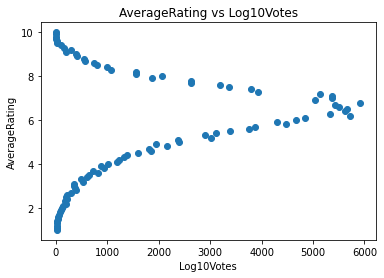

In [138]:
#y variable would be the average rating and the x variable would be log10votes.
plt.scatter(AverageRating_Log10Votes['log10votes'],AverageRating_Log10Votes['averageRating'], )
plt.title("AverageRating vs Log10Votes")
plt.xlabel("Log10Votes")
plt.ylabel("AverageRating")
plt.show()

In [74]:
#Perform linear regression on your data (averageRating vs log10Votes) created in the previous step in three different ways:
x,y = AverageRating_Log10Votes['log10votes'],AverageRating_Log10Votes['averageRating']


In [139]:
#Perform linear regression on your data (averageRating vs log10Votes) created in the previous step in three different ways:
#8.1 Using sklearn 
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
regr = LinearRegression().fit(AverageRating_Log10Votes[['log10votes']],AverageRating_Log10Votes[['averageRating']])
r2 = regr.score(AverageRating_Log10Votes[['log10votes']],AverageRating_Log10Votes[['averageRating']]) 
print("Regression cofficient for Scklearn method: ", regr.coef_)
print("Regression intercept for Scklearn method: ", regr.intercept_)
print("r2 squared value for Scklearn method: ", r2)

Regression cofficient for Scklearn method:  [[0.00036914]]
Regression intercept for Scklearn method:  [4.84894819]
r2 squared value for Scklearn method:  0.0697163745769458


In [140]:
#8.2 Using scipy 
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("Regression cofficient for Scipy method: ", slope)
print("Regression intercept for Scipy method: ", intercept)
print("r2 squared value for Scipy method: ", r_value**2)

Regression cofficient for Scipy method:  0.0003691390807289549
Regression intercept for Scipy method:  4.848948186376317
r2 squared value for Scipy method:  0.06971637457694574


In [207]:
#8.3 Using pytorch
x_train = np.array(x, dtype = np.float32).reshape(-1,1)
y_train = np.array(y, dtype = np.float32).reshape(-1,1)
import torch
from torch.autograd import Variable
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

In [208]:
inputDim = 1        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.01
epochs = 100

model = linearRegression(inputDim, outputDim)
##### For GPU #######
if torch.cuda.is_available():
    model.cuda()

In [209]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [210]:
for epoch in range(epochs):
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

tensor(3314140.5000, grad_fn=<MseLossBackward0>)
epoch 0, loss 3314140.5
tensor(5.8462e+16, grad_fn=<MseLossBackward0>)
epoch 1, loss 5.846195666681856e+16
tensor(1.0313e+27, grad_fn=<MseLossBackward0>)
epoch 2, loss 1.0312852237113084e+27
tensor(inf, grad_fn=<MseLossBackward0>)
epoch 3, loss inf
tensor(inf, grad_fn=<MseLossBackward0>)
epoch 4, loss inf
tensor(inf, grad_fn=<MseLossBackward0>)
epoch 5, loss inf
tensor(inf, grad_fn=<MseLossBackward0>)
epoch 6, loss inf
tensor(inf, grad_fn=<MseLossBackward0>)
epoch 7, loss inf
tensor(inf, grad_fn=<MseLossBackward0>)
epoch 8, loss inf
tensor(nan, grad_fn=<MseLossBackward0>)
epoch 9, loss nan
tensor(nan, grad_fn=<MseLossBackward0>)
epoch 10, loss nan
tensor(nan, grad_fn=<MseLossBackward0>)
epoch 11, loss nan
tensor(nan, grad_fn=<MseLossBackward0>)
epoch 12, loss nan
tensor(nan, grad_fn=<MseLossBackward0>)
epoch 13, loss nan
tensor(nan, grad_fn=<MseLossBackward0>)
epoch 14, loss nan
tensor(nan, grad_fn=<MseLossBackward0>)
epoch 15, loss nan


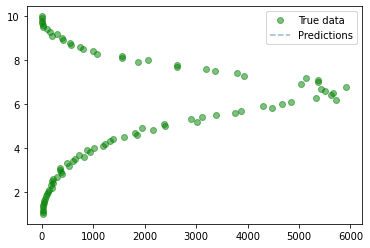

In [212]:
with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()


plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

In [213]:
#Why is it different ?

#It is different becaue for the pytorch model we have to decide on the hyper parameters that are used for the model.

In [213]:
#How can we improve the model 

#To improve the model we can preform model diagnostics to assess linearity (i dont think the relationship between average rating and log10votes is linear), normality, independency, and homoscedasticity.
#Additionally we could add polynomial terms to the model. I believe there is a nonlinear relationship between the independent and target variable.
